# **Лабораторная работа №7**

## **Задача 7.1.28**

Дана задача Коши для системы двух обыкновенных дифференциальных уравнений 
                            
$$
\begin{cases}
    u' = \frac{u^2}{v}\\
    v' = \frac{u}{(v + t)^2}\\
    u(0) = 1, v(0) = 1    
\end{cases}
$$

#### **1. Модифицировать программу решения задачи по  явному методу Эйлера из лабораторной работы 6 для решения системы дифференциальных уравнений.**
Найти приближенное решение задачи Коши с шагом $ h=0.01 $. на отрезке $[0,1]$. Оценить величину погрешности по правилу Рунге.

In [ ]:
#u = y[0], v = y[1]

def f1(y: list, t):
    return (y[0]**2)/y[1]


def f2(y: list, t):
    return y[0]/((y[1] + t)**2)


def Eiler(a, b, h, n, funcs, t0, y0):
    y = y0.copy()
    t = t0
    for i in range(n):
        tmp = []
        for k in range(len(funcs)):
            tmp.append(y[k] + h*funcs[k](y, t))
        t += h
        y = tmp
    return y

def getRungeEps(a, b, h, n, rgt_fun, t0, y0, counter_fun, p):
    lst1 = counter_fun(a, b, h/2, 2*n, rgt_fun, t0, y0)
    lst2 = counter_fun(a, b, h, n, rgt_fun, t0, y0)
    return [abs(lst1[i] - lst2[i]/(2**p - 1)) for i in range(len(y0))]

In [ ]:
funcs = [f1, f2]
y = [1, 1]
t = 0
a = 0
b = 1
h = 0.01
n = int((b-a)/h)
ans = Eiler(a, b, h, n, funcs, t, y)
print("Eiler met:  U = {:.5f},  V = {:.5f}".format(ans[0], ans[1]))
eps = getRungeEps(a, b, h, n, funcs, t, y, Eiler, 1)
print("Runge eps: dU = {:.5f}, dV = {:.5f}".format(eps[0], eps[1]))

Eiler met:  U = 4.15286,  V = 1.59623
Runge eps: dU = 0.07758, dV = 0.00191


#### **2. Модифицировать программу решения задачи по индивидуальному варианту из лабораторной работы 6 для решения системы дифференциальных уравнений.**
Найти приближенное решение задачи Коши с шагом $ h=0.01 $. на отрезке $[0,1]$.
Оценить величину погрешности по правилу Рунге.

_Метод варианта 28 - усовершенствованный метод Эйлера_

In [ ]:
def modEiler(a, b, h, n, funcs, t0, y0):
    y = y0.copy()
    t = t0
    for i in range(n):
        tmp = []
        for i in range(len(funcs)):
            tmpy = [y[j] + h/2 * funcs[j](y, t) for j in range(len(funcs))]
            tmp.append(y[i] + h*funcs[i](tmpy, t + h/2))
        t += h
        y = tmp
    return y

In [ ]:
t = 0
ans = modEiler(a, b, h, n, funcs, t, y)
print("modEiler met:  U = {:.5f},  V = {:.5f}".format(ans[0], ans[1]))
eps = getRungeEps(a, b, h, n, funcs, t, y, modEiler, 1)
print("   Runge eps: dU = {:.5f}, dV = {:.5f}".format(eps[0], eps[1]))

modEiler met:  U = 4.31184,  V = 1.60013
   Runge eps: dU = 0.00125, dV = 0.00006


#### **3. На одном чертеже построить графики первой компоненты u(t) найденного обоими методами решения, а на другом - графики второй компоненты v(t) найденного обоими методами решения.**
4. Сравнить полученные результаты.

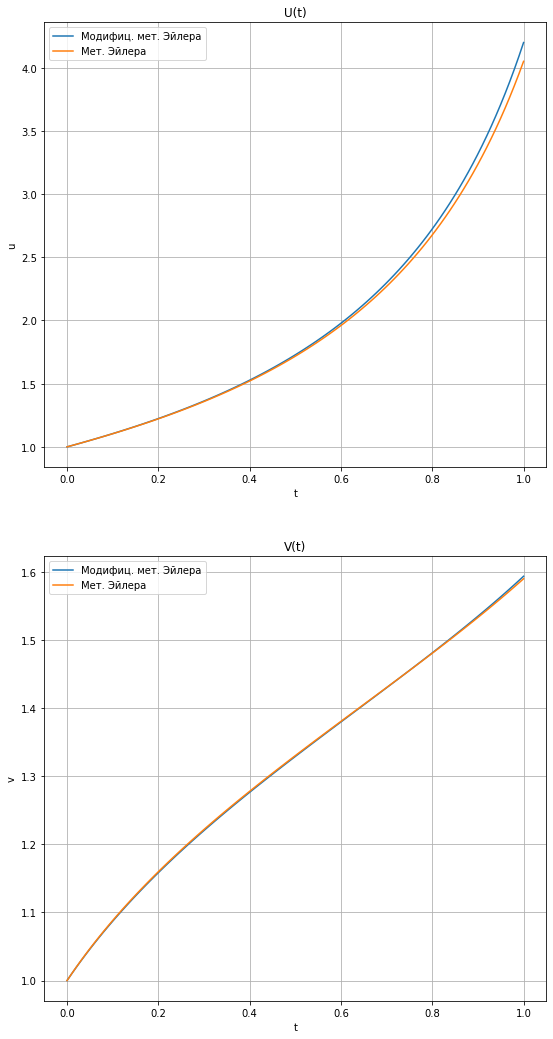

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 18))

plt.subplot(2, 1, 1)
plt.title("U(t)") # заголовок
plt.xlabel("t") 
plt.ylabel("u") 
plt.grid()
# plt.yscale('log')
# plt.xscale('log')
t = 0
x = np.linspace(a, b, n)
y2 = [Eiler(a, b, h, i, funcs, t, y.copy())[0] for i in range(n)]
y1 = [modEiler(a, b, h, i, funcs, t, y.copy())[0] for i in range(n)]
plt.plot(x, y1, label="Модифиц. мет. Эйлера") 
plt.plot(x, y2, label="Мет. Эйлера") 
plt.legend()

plt.subplot(2, 1, 2)
plt.title("V(t)") # заголовок
plt.xlabel("t") 
plt.ylabel("v") 
plt.grid()
t = 0
# plt.yscale('log')
# plt.xscale('log')
x = np.linspace(a, b, n)
y2 = [Eiler(a, b, h, i, funcs, t, y.copy())[1] for i in range(n)]
y1 = [modEiler(a, b, h, i, funcs, t, y.copy())[1] for i in range(n)]
plt.plot(x, y1, label="Модифиц. мет. Эйлера") 
plt.plot(x, y2, label="Мет. Эйлера") 
plt.legend()

Можем сделать вывод, что в целом оба метода сработали как надо и дали похожие результаты. Уточнённая по Рунге погрешность, тем не менее, всё равно меньше у модифицированного метода Эйлера.

## **Задача 7.2.28**

Дана задача Коши для двух систем обыкновенных дифференциальных уравнений с постоянными коэффициентами 
$$
Y'(t) = AY(t), \quad Y(0) = Y_0, \\
Z'(t) = BZ(t), \quad Z(0) = Z_0,
$$
где $ А $ и $ В $ - заданные матрицы, $Y_0, Z_0$ - заданные векторы. Исследовать поведение решения систем уравнения.

_Параметры варианта 28:_
$$ 
А = 
 \begin{pmatrix}
  -7.146 & -2.704 & 6.981 & 2.364 \\
  -2.292 & -8.358 & -3.549 & 6.248 \\
  -0.016 & 6.93 & -4.356 & 3.652 \\
  -7.508 & 1.251 & -0.171 & -8.139
 \end{pmatrix}\quad Y_0 = 
  \begin{pmatrix}
  8.4 \\
  8.4 \\
  6.4 \\
  8.4
 \end{pmatrix}, \\
 B = 
 \begin{pmatrix}
  -206.91 & 79.356 & -112.31 & 20.083 \\
  47.474 & -25.434 & 57.346 & -35.228 \\
  -112.31 & 18.883 & -69.502 & 54.186 \\
  66.685 & 11.374 & -2.035 & -16.16
 \end{pmatrix}\quad Z_0 = 
  \begin{pmatrix}
  10.4 \\
  5.2 \\
  8.4 \\
  5.2
 \end{pmatrix}.
$$

#### **1. Используя встроенную функцию пакета NUMPY для нахождения собственных чисел матриц A и B, найти коэффициенты жесткости обеих систем. Установить, какая задача является жесткой**

In [ ]:
A = np.array([[-7.146, -2.704, 6.981, 2.364], [-2.292, -8.358, -3.549, 6.248], [-0.016, 6.93, -4.356, 3.652], [-7.508, 1.251, -0.171, -8.139]])
B = np.array([[-206.91, 79.356, -112.31, 20.083], [47.474, -25.434, 57.346, -35.228], [-112.31, 18.883, -69.502, 54.186], [66.685, 11.374, -2.035, -16.16]])
# B = np.array([[-277.24, 70.792, -20.425, 16.133], [-65.326, -274.53, -42.954, -18.304], [-34.332, -11.256, -8.494, -90.68], [-15.585, -36.184, 85.241, -5.734]])
Y_0 = [8.4, 8.4, 6.4, 8.4]
Z_0 = [10.4, 5.2, 8.4, 5.2]
print("A: Вещественные части собств. чисел:") 
An = [np.real(el) for el in np.linalg.eig(A)[0]]
for el in An:
    print(el)
An = [abs(el) for el in An]
print("s = {:.2f}".format(max(An) / min(An)))
print()

print("В: Вещественные части собств. чисел:") 
Bn = [np.real(el) for el in np.linalg.eig(B)[0]]
for el in Bn:
    print(el)
Bn = [abs(el) for el in Bn]
print("s = {:.2f}".format(max(Bn) / min(Bn)))

A: Вещественные части собств. чисел:
-1.9994678648246853
-1.9994678648246853
-12.000032135175317
-12.000032135175317
s = 6.00

В: Вещественные части собств. чисел:
-300.00402854221954
-8.001036259528838
-8.001036259528838
-1.9998989387231305
s = 150.01


Таким образом наблюдаем, что число жёсткости для обеих матриц >>1. Тем не менее, вторую задачу можно квалифицировать как гораздо более жёсткую, чем первую

#### **2. Численно решить обе задачи  на отрезке $[0,1]$ c шагом $h=0.01$ явным методом Эйлера. Определить, для какой из задач явный метод неустойчив при данном шаге h. Построить графики компонент полученного решения.**

In [ ]:
funcs2 =[]
for lin in A:
    def fun(y:list, t, line = lin):
        res = 0;
        for i in range(len(y)):
            res += line[i]*y[i]
        return res
    
    funcs2.append(fun)
    
funcs3 =[]
for lin in B:
    def fun(y:list, t, line = lin):
        res = 0
        for i in range(len(y)):
            res += line[i]*y[i]
        return res
    funcs3.append(fun)

In [ ]:
ans = Eiler(a, b, h, n, funcs2, t, Y_0)
print("A: Eiler met:  ", end='')
for i in range(len(ans)):
    print("y{:d} = {:.5f}".format(i, ans[i]), end = '  ')
print()
ans = Eiler(a, b, h, n, funcs3, t, Z_0)
print("B: Eiler met:  ", end='')
for i in range(len(ans)):
    print("y{:d} = {:.5f}".format(i, ans[i]), end = '  ')
print()

A: modEiler met:  y0 = 0.01193  y1 = -0.01765  y2 = -0.00845  y3 = -0.01817  
B: modEiler met:  y0 = 130194634203048730941699062098759095297848779661703761428250661635110626613085188850578694509718571769044606144759383430388883324234672283993348488822784.00000  y1 = -41507994895208770852303883761500568921074580035981823716025996073269905430868282995633397187325636188810907811699529426882636171930905666287292087533568.00000  y2 = 73512042580538546173489007883614791329778397843076287065365797742851333265609663819215151883148905407089551643876346649012723429566131185139513584254976.00000  y3 = -28397004800972608182072028559664633655770922209840462272224445399789431000180250720488395511664109217956079590243722173486853355584690009267595278024704.00000  


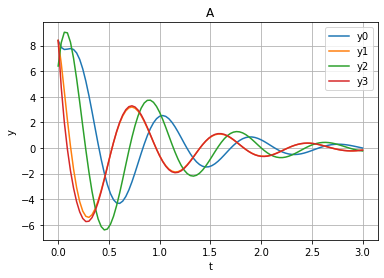

In [ ]:
plt.title("A") # заголовок
plt.xlabel("t") 
plt.ylabel("y") 
plt.grid()
# plt.yscale('log')
# plt.xscale('log')
t = 0
x = np.linspace(a, b, n)
y1 = [Eiler(a, b, h, i, funcs2, t, Y_0) for i in range(n)]
for i in range(len(y1[0])):
    plt.plot(x, [y1[j][i] for j in range(n)], label="y" + str(i)) 
plt.legend()


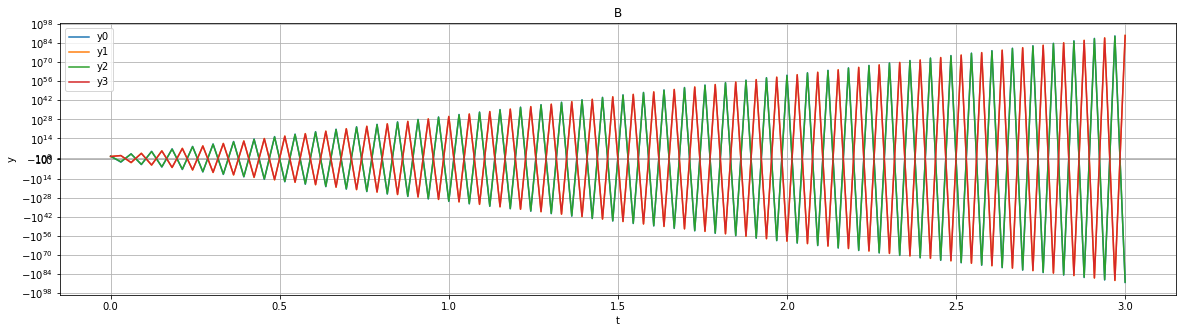

In [ ]:
plt.figure(figsize=(20, 5))
plt.title("B") # заголовок
plt.xlabel("t") 
plt.ylabel("y") 
plt.grid()
plt.yscale('symlog')
# plt.xscale('log')
x = np.linspace(a, b, n)
y2 = [Eiler(a, b, h, i, funcs3, t, Z_0) for i in range(n)]
for i in range(len(y2[0])):
    plt.plot(x, [y2[j][i] for j in range(n)], label="y" + str(i)) 
plt.legend()

По графику можем понять, что задача B является жёсткой. На логарифмической шкале хорошо видно, что чем дальше от начальной точки, тем сильнее скачет наш график. Не удивительно: у задачи В оценка числа жёсткости больше, чем в задаче А почти в 30 раз.

#### **3. Численно решить обе задачи  на отрезке $[0,1]$ c шагом $h=0.01$ по индивидуальному варианту из лабораторной работы 6.**


Определить, для какой из задач метод неустойчив при данном шаге h. h=0.01. Построить графики компонент полученного решения

In [ ]:
ans = modEiler(a, b, h, n, funcs2, t, Y_0)
print("A: Eiler met:  ", end='')
for i in range(len(ans)):
    print("y{:d} = {:.5f}".format(i, ans[i]), end = '  ')
print()
ans = modEiler(a, b, h, n, funcs3, t, Z_0)
print("B: Eiler met:  ", end='')
for i in range(len(ans)):
    print("y{:d} = {:.5f}".format(i, ans[i]), end = '  ')
print()

A: Eiler met:  y0 = 1.00513  y1 = -0.01202  y2 = 1.46765  y3 = -0.01230  
B: Eiler met:  y0 = 52524934817378588928016145810565913116672.00000  y1 = -16745734105068598493528355462029267435520.00000  y2 = 29657253299804031389141122128561779507200.00000  y3 = -11456315656248029166854113622308616667136.00000  


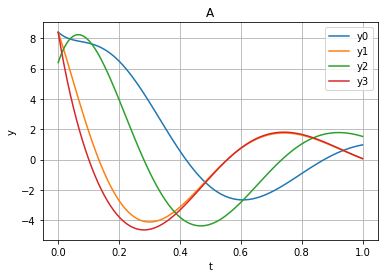

In [ ]:
plt.title("A") # заголовок
plt.xlabel("t") 
plt.ylabel("y") 
plt.grid()
# plt.yscale('log')
# plt.xscale('log')
t = 0
x = np.linspace(a, b, n)
y1 = [modEiler(a, b, h, i, funcs2, t, Y_0) for i in range(n)]
for i in range(len(y1[0])):
    plt.plot(x, [y1[j][i] for j in range(n)], label="y" + str(i)) 
plt.legend()


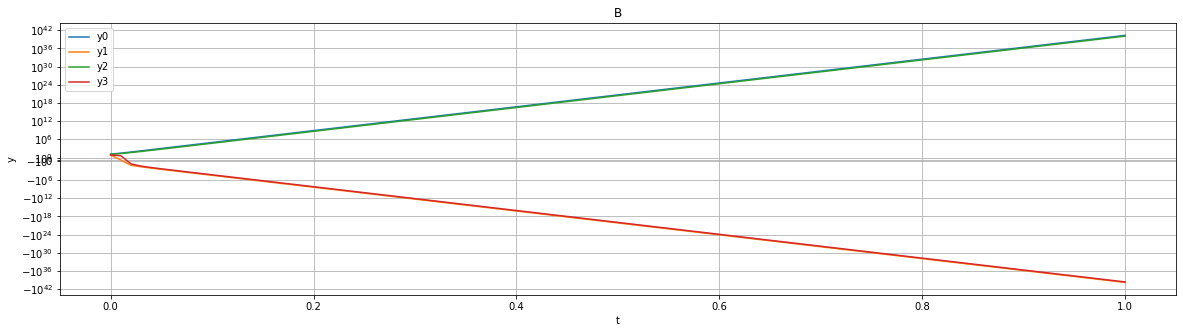

In [ ]:
plt.figure(figsize=(20, 5))
plt.title("B") # заголовок
plt.xlabel("t") 
plt.ylabel("y") 
plt.grid()
plt.yscale('symlog')
# plt.xscale('log')
x = np.linspace(a, b, n)
y2 = [modEiler(a, b, h, i, funcs3, t, Z_0) for i in range(n)]
for i in range(len(y2[0])):
    plt.plot(x, [y2[j][i] for j in range(n)], label="y" + str(i)) 
plt.legend()

Здесь обе задачи представляются нам устойчивыми. Тем не менее, для задачи В решение выглядит неоправданно большим, достикгая значений $10^{42}$. Скорее всего, дело в самой задаче.

#### **4. Для жесткой задачи экспериментально подобрать шаг $h$, при котором графики компонент решения, полученного по явному методу Эйлера, визуально совпадают с графиками компонент решения, полученного по неявному методу с шагом $h=0.01$**

Сравнить найденное значение шага с теоретическим значением шага, при котором  явный метод Эйлера для жестких задач должен быть устойчивым

In [ ]:
def nEiler(a, b, h, n, funcs, t0, y0):
    y = y0.copy()
    t = t0
    for i in range(n):
        tmp = []
        # Прогноз
        for k in range(len(funcs)):
            tmp.append(y[k] + h*funcs[k](y, t))
        t += h
        tmp2 = []
        # Уточнение
        for k in range(len(funcs)):
            tmp2.append(y[k] + h*funcs[k](tmp, t))
        y = tmp2
    return y

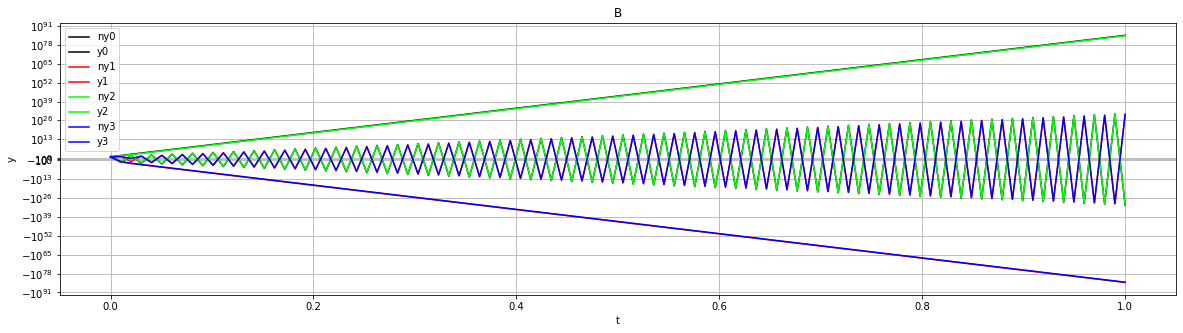

In [ ]:
plt.figure(figsize=(20, 5))
plt.title("B") # заголовок
plt.xlabel("t") 
plt.ylabel("y") 
plt.grid()
plt.yscale('symlog')
# plt.xscale('log')
x = np.linspace(a, b, n)
y2 = [nEiler(a, b, h, i, funcs3, t, Z_0) for i in range(n)]
y3 = [Eiler(a, b, h, i, funcs3, t, Z_0) for i in range(n)]

clr = ((0, 0, 0), (1, 0, 0), (0, 1, 0), (0, 0, 1))
for i in range(len(y2[0])):
    plt.plot(x, [y2[j][i] for j in range(n)], label="ny" + str(i), color = clr[i]) 
    plt.plot(x, [y3[j][i] for j in range(n)], label="y" + str(i), color = clr[i])
plt.legend()

Нарисовав на одном графике явный метод Эйлера и неявный (оценку производим по явному), наблюдаем странную картину. Решения, получаемые явным и неявным методом явно не совпадают. Это странно, с учётом того, что мы лишь уточняем значения на каждом шаге.
При попытке уменьшить h до 0.0025, ситуация становится лучше:

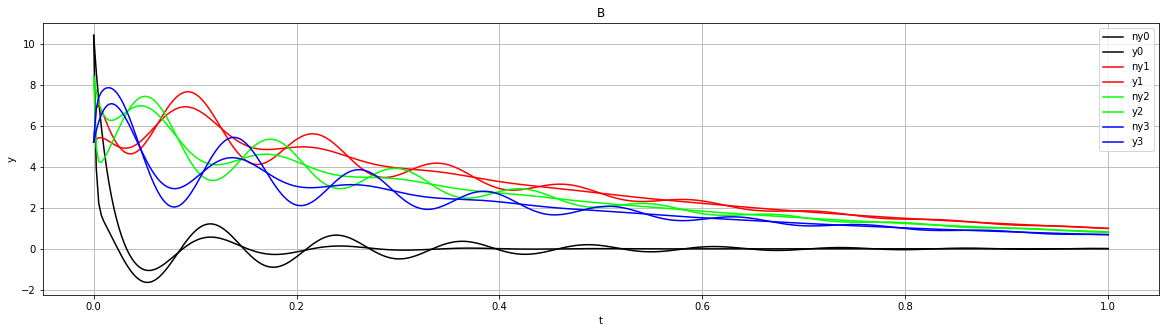

In [ ]:
plt.figure(figsize=(20, 5))
plt.title("B") # заголовок
plt.xlabel("t") 
plt.ylabel("y") 
plt.grid()
# plt.yscale('symlog')
# plt.xscale('log')
n = 400
h = 1/n
x = np.linspace(a, b, n)
y2 = [nEiler(a, b, h, i, funcs3, t, Z_0) for i in range(n)]
y3 = [Eiler(a, b, h, i, funcs3, t, Z_0) for i in range(n)]

for i in range(len(y2[0])):
    plt.plot(x, [y2[j][i] for j in range(n)], label="ny" + str(i), color = clr[i]) 
    plt.plot(x, [y3[j][i] for j in range(n)], label="y" + str(i), color = clr[i])
plt.legend()

Мы уже наблюдаем близость графиков явного и неявного методов. Теперь рассчитаем теоретическую h, необходимую для устойчивости.

Условие абсолютной устойчивости: 
$h_i \leq h_0 = \frac{2}{|\lambda_i|}$, где $\lambda_i$ - коэффициент при $y_i$
Таким образом $h = min(h_i)|_{i \in [0, 3]}$
Наши $\lambda_i$ по сути являются диагональю матрицы В. С учётом этого чтобы найти минимальный $h_i$, нужно найти максимальный (из-за обратной пропорциональности) по модулю элемент главной диагонали и подставить в формулу выше. Для матрицы В $ \lambda_{max} = 206.91 $

Подставляя, получаем, что $h \leq \frac{2}{206.91} = 0.009666$

**Вывод:** в целом найденный экспериментально h попал в диапазон, установленный аналитически. Поэтому задачу нахождения решения жёсткой задачи можно считать решённой. Но всё еще поведение графика [17] остатся достаточно загадочным, так как неявный метод Эйлера хоть и показал устойчивость, что от него и требовалось, но не дал хотя бы приблизительно адекватного решения, чтобы можно было к нему подгонять решение явным методом. Из-за этого в точнности выполнить задание 4 не представилось возможным.